In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv("C:/Users/nico_/Desktop/ITBA/TFI/github/tfi_itba_gfw/python/df_procesado/out.csv", header="infer", sep=",",low_memory=False)

df = df.drop(['Unnamed: 0','mmsi', 'source','lat', 'lon','timestamp','source','datetime'], axis = 1)
#for column in df.columns:
#    print(df[column].isna().sum())
#print(df)

In [12]:
X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))

1286
12710


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['SI', 'NO'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)


Arboles de decision parametros default

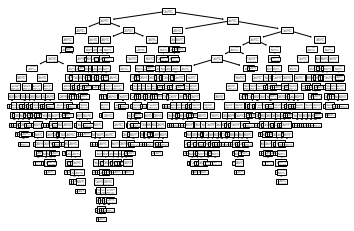

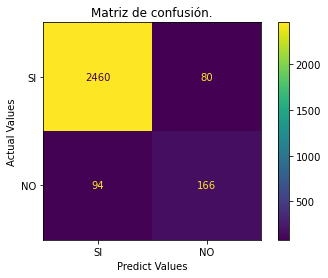

Precision,Recall,Accuracy,F1
0.67,0.64,0.94,0.66


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

tree.plot_tree(dt)

evaluate_model('Arboles de decision parametros default',y_test, y_pred)


In [15]:
print(dict(zip(df.columns, dt.feature_importances_)))

{'distance_from_shore': 0.21137257056180137, 'distance_from_port': 0.29492215519371917, 'speed': 0.013734131894350734, 'course': 0.01054118965259298, 'is_fishing': 0.0002149674705774074, 'sun_state': 0.010904322624954216, 'distance': 0.03017893968981801, 'timediff': 0.020312391064903228, 'S0': 0.0021705440615371356, 'A0': 0.0004969573084870894, 'J0': 0.0046280610578405676, 'C0': 0.033505144706131286, 'Vavg': 0.008819638426521049, 'Delta_S': 0.021561979236513585, 'Cavg': 0.00576034429621376, 'Delta_C': 0.004430334426944424, 'speed_lag_1': 0.006523746103545071, 'speed_lag_2': 0.01861905612922794, 'speed_lag_3': 0.05012254284551319, 'speed_lag_4': 0.004931179149206174, 'speed_lag_5': 0.013376786950782087, 'speed_lag_6': 0.006014631781722812, 'course_lag_1': 0.020590773027710205, 'course_lag_2': 0.032700272122081174, 'course_lag_3': 0.004584244663733866, 'course_lag_4': 0.0139647689684929, 'course_lag_5': 0.00954378614489836, 'course_lag_6': 0.01759751917629636, 'S0_lag_1': 0.0087611535610

In [16]:
print(df.columns)

Index(['distance_from_shore', 'distance_from_port', 'speed', 'course',
       'is_fishing', 'sun_state', 'distance', 'timediff', 'S0', 'A0', 'J0',
       'C0', 'Vavg', 'Delta_S', 'Cavg', 'Delta_C', 'speed_lag_1',
       'speed_lag_2', 'speed_lag_3', 'speed_lag_4', 'speed_lag_5',
       'speed_lag_6', 'course_lag_1', 'course_lag_2', 'course_lag_3',
       'course_lag_4', 'course_lag_5', 'course_lag_6', 'S0_lag_1', 'S0_lag_2',
       'S0_lag_3', 'S0_lag_4', 'S0_lag_5', 'S0_lag_6', 'A0_lag_1', 'A0_lag_2',
       'A0_lag_3', 'A0_lag_4', 'A0_lag_5', 'A0_lag_6', 'J0_lag_1', 'J0_lag_2',
       'J0_lag_3', 'J0_lag_4', 'J0_lag_5', 'J0_lag_6', 'C0_lag_1', 'C0_lag_2',
       'C0_lag_3', 'C0_lag_4', 'C0_lag_5', 'C0_lag_6'],
      dtype='object')


In [17]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict


application_train = X_train.join(y_train)
application_train, categorical_feats, encoder_dict = label_encoder(application_train)

X = application_train.drop('is_fishing', axis=1)
y = application_train.is_fishing

#dtrain = lgb.Dataset(data=X, label=y)

def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations=100):
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    # Objective Function
    #def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,lambda_l1, lambda_l2, learning_rate):
    def hyp_lgbm(num_leaves, feature_fraction,   min_split_gain, lambda_l1, lambda_l2, learning_rate):

            params = {'application':'binary','num_iterations': num_iterations,'early_stopping_round':int(50 + 7/learning_rate),
                        'metric':'lgb_r2_score'} # Default parameters

            params["num_leaves"] = int(round(num_leaves))
            params['feature_fraction'] = max(min(feature_fraction, 1), 0)
            #params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
            #params['max_depth'] = int(round(max_depth))
            params['min_split_gain'] = min_split_gain
            #params['min_child_weight'] = min_child_weight
            
            params['learning_rate']= max(min(learning_rate, 1), 0)
            params['lambda_l1']= lambda_l1
            params['lambda_l2']= lambda_l2
            
            params['verbose']=-1
            params['objective'] ='binary'
            params['boost_from_average']=True #adjusts initial score to the mean of labels for faster convergence
            
            cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=lgb_r2_score)
                            
            # print(cv_results)
            return np.max(cv_results['r2-mean'])
    # Domain space-- Range of hyperparameters 
    #https://lightgbm.readthedocs.io/en/latest/Parameters.html

    pds = {
                #'eta':(0.025,0.15),
                'num_leaves': (8, 1023),
                'feature_fraction': (0.1, 1.0),
                #'bagging_fraction': (0.1, 1),
                #'max_depth': (30, 70),
                'min_split_gain': (0.0, 20),
                #'min_child_weight': (10, 50),
                'lambda_l1':(0.0,10),
                'lambda_l2':(0.0,100),
                'learning_rate':(0.01, 0.1)          
                }



    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                        
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)
    return optimizer.max['params']

parametros_optimos = bayesion_opt_lgbm(X, y, init_iter=100, n_iters=500, random_state=77, seed = 101, num_iterations = 1000)


|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
|  1        |  0.417    |  0.9272   |  6.422    |  75.37    |  0.02254  |  1.746    |  807.8    |
|  2        |  0.3767   |  0.3935   |  5.411    |  24.02    |  0.05909  |  8.011    |  733.9    |
|  3        |  0.3408   |  0.853    |  5.885    |  29.62    |  0.03529  |  14.11    |  436.9    |
|  4        |  0.4309   |  0.1516   |  7.47     |  45.23    |  0.02582  |  0.9875   |  304.9    |
|  5        |  0.3877   |  0.1601   |  7.512    |  6.377    |  0.04887  |  7.283    |  162.3    |
|  6        |  0.4358   |  0.592    |  4.433    |  3.606    |  0.08406  |  5.466    |  179.5    |
|  7        |  0.3796   |  0.6799   |  1.075    |  35.32    |  0.04471  |  8.911    |  999.7    |
|  8

In [18]:
display(parametros_optimos)

{'feature_fraction': 0.8419359324213374,
 'lambda_l1': 0.35101112045888283,
 'lambda_l2': 0.026139315684337028,
 'learning_rate': 0.02932630193310226,
 'min_split_gain': 0.1769951442943274,
 'num_leaves': 941.1904256339125}

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11656
[LightGBM] [Info] Number of data points in the train set: 11196, number of used features: 51
[LightGBM] [Info] Start training from score 0.091640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

light_gbm optimizacion bayesiana

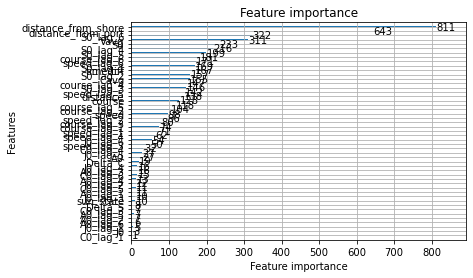

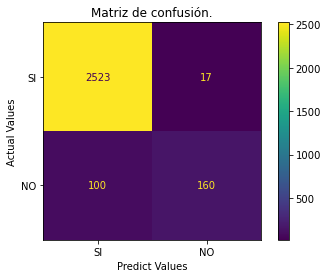

Precision,Recall,Accuracy,F1
0.90,0.62,0.96,0.73


In [19]:
#parametros_optimos['max_depth'] = int(round(parametros_optimos['max_depth']))
parametros_optimos['num_leaves'] = int(round(parametros_optimos['num_leaves']))

dtrain = lgb.Dataset(data=X, label=y)
def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True
dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
#clf = lgb.fit(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)

lgb.plot_importance(dt)

y_pred = dt.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
#print(y_pred)

evaluate_model('light_gbm optimizacion bayesiana',y_test, y_pred)
#cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
